Testing the difference between differend algorithms

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from utils.plot import *

Loading data

In [2]:
BASE_PATH = 'results/lenet_tanh_compress_50/'
SAVE_FILES = {
    'RND': 'lenet_RND_save.csv',
    'PSO': 'lenet_PSO_save.csv',
    'GA': 'lenet_GA_save.csv',
}

In [3]:
data = {
    'run': [],
    'RND': [],
    'PSO': [],
    'GA': [],
}

for dir in os.listdir(BASE_PATH):
    data['run'].append(dir)
    for key in SAVE_FILES.keys():
        save_df = pd.read_csv(os.path.join(BASE_PATH, dir, SAVE_FILES[key]))
        data[key].append(save_df['fitness'].max())

data = pd.DataFrame(data)
data

,run,RND,PSO,GA
0,run7,5.139218,6.008644,5.669333
1,run3,4.324319,4.743931,5.389916
2,run4,4.657076,5.857300,5.358747
3,run10,4.951717,6.290350,5.590544
4,run2,5.434084,5.333379,4.836840
5,run8,4.737472,5.090430,5.551156
6,run9,4.915506,5.403244,5.762508
7,run11,4.693856,5.855793,5.063529
8,run1,4.547420,4.681296,4.814024
9,run5,4.953595,5.818584,5.511670


Print graph

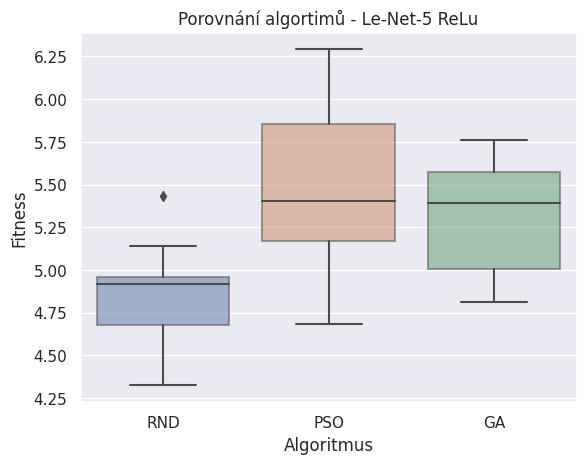

In [4]:
sns.set(style="darkgrid")
graph = sns.boxplot(data=data, boxprops=dict(alpha=0.5)) #  medianprops={"color": "coral"}
graph.set(xlabel = 'Algoritmus', ylabel='Fitness', title='Porovnání algortimů - Le-Net-5 ReLu')
graph.get_figure().savefig('results/plots/box2.pdf')

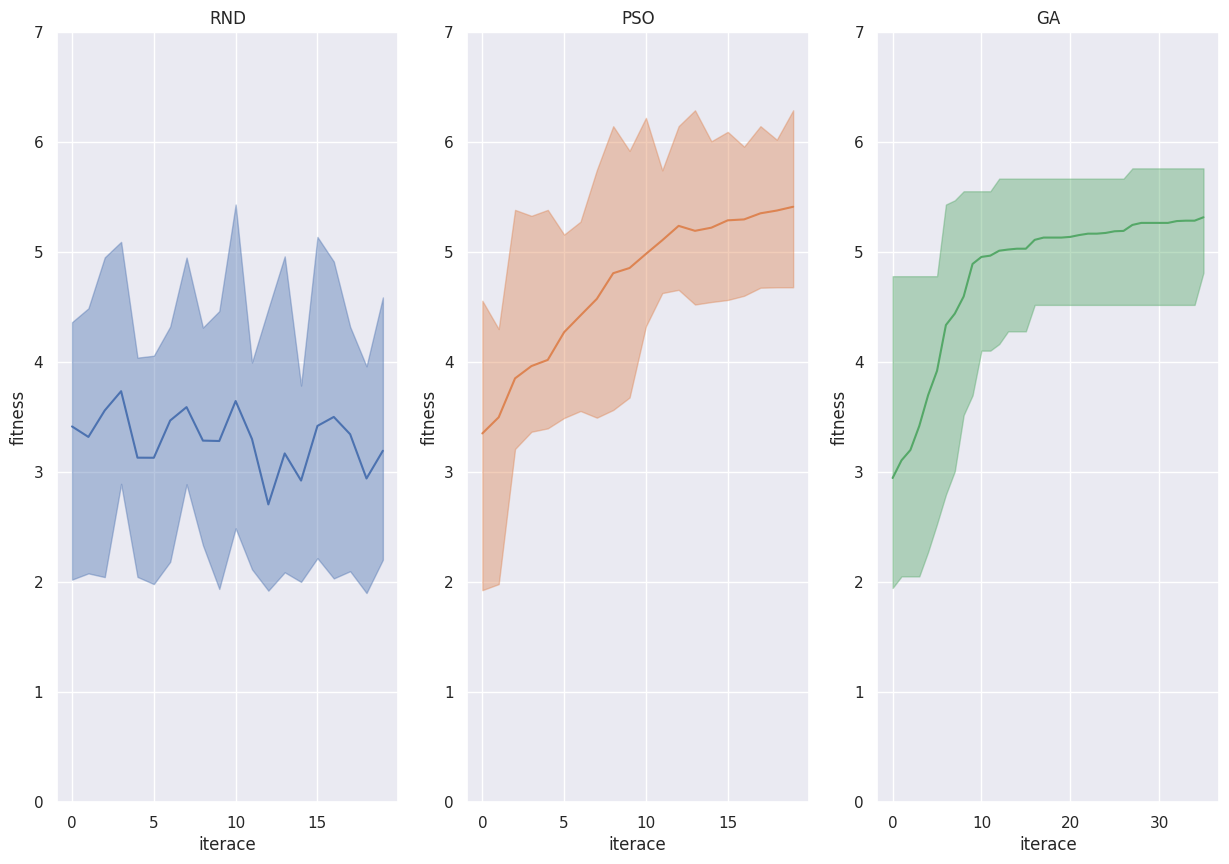

In [5]:
files = {
    'RND': [],
    'PSO': [],
    'GA': [],
}

for key in files.keys():
    for i in range(1, 12):
        files[key].append(f'{BASE_PATH}run{i}/lenet_{key}_save.csv')

plot_optimalization_progress(files)
plt.savefig('results/plots/line2.pdf')

Showing performance graphs

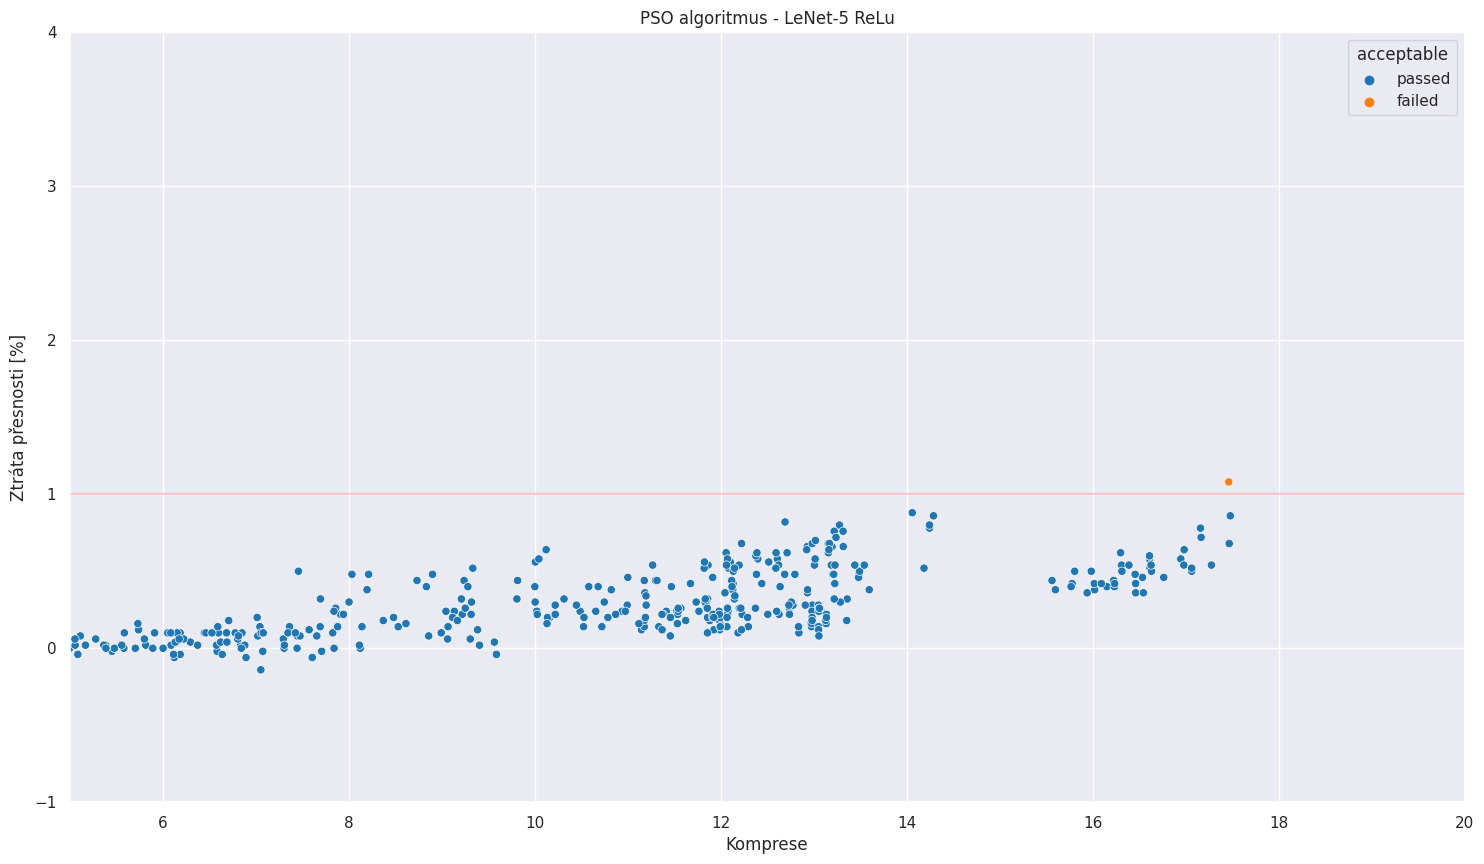

In [6]:
plt_data = pd.read_csv('results/lenet_tanh_compress_50/run10/lenet_PSO_save.csv')
#plt_data = pd.read_csv('results/lenet_relu_compress_50/run8/lenet_PSO_save.csv')
plot_alcr(plt_data)
plt.title('PSO algoritmus - LeNet-5 ReLu')
plt.xlabel('Komprese')
plt.ylabel('Ztráta přesnosti [%]')
plt.savefig('results/plots/scatter2.pdf')